In [0]:
import torch
import pandas  as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
log_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Log_data/training data mod.csv', encoding = 'utf-8')
#print(log_data)

Log_datapoints = torch.Tensor(log_data.values)
#print (Log_datapoints.size())

In [4]:
print(log_data.columns)


Index(['MD', 'CALI', 'DEN_QI_EDIT', 'DT_QI_EDIT', 'GR', 'RT', 'IGR', 'VSH',
       'porosity', 'Density', 'Sonic', 'Gamma Ray'],
      dtype='object')


In [5]:
print(log_data.head())


       MD      CALI  DEN_QI_EDIT  ...   Density     Sonic  Gamma Ray
0  7000.0  15.12443     2.153361  ...  0.809833  0.833746   0.175342
1  7000.5  14.40805     2.144553  ...  0.806521  0.847708   0.178873
2  7001.0  14.50578     2.135744  ...  0.803208  0.831020   0.170196
3  7001.5  14.50594     2.126936  ...  0.799895  0.826749   0.157736
4  7002.0  15.25517     2.228690  ...  0.838163  0.807354   0.162202

[5 rows x 12 columns]


In [6]:
print(log_data.isnull().sum())

MD             0
CALI           0
DEN_QI_EDIT    0
DT_QI_EDIT     0
GR             0
RT             0
IGR            0
VSH            0
porosity       0
Density        0
Sonic          0
Gamma Ray      0
dtype: int64


In [0]:
target = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Log_data/training data .csv', encoding = 'utf-8')[['porosity']]

In [8]:
target

,porosity
0,0.325520
1,0.330671
2,0.335822
3,0.340973
4,0.281468
5,0.300130
6,0.296773
7,0.283257
8,0.284928
9,0.295236


In [9]:
target.shape

(10378, 1)

In [10]:
log_data_copy = log_data.copy()
log_data_copy


,MD,CALI,DEN_QI_EDIT,DT_QI_EDIT,GR,RT,IGR,VSH,porosity,Density,Sonic,Gamma Ray
0,7000.0,15.124430,2.153361,107.50000,32.45100,6.970430e+01,0.075274,0.017674,0.198778,0.809833,0.833746,0.175342
1,7000.5,14.408050,2.144553,109.30020,33.10445,7.034516e+01,0.078556,0.018525,0.198778,0.806521,0.847708,0.178873
2,7001.0,14.505780,2.135744,107.14850,31.49860,7.813281e+01,0.070489,0.016447,0.134931,0.803208,0.831020,0.170196
3,7001.5,14.505940,2.126936,106.59790,29.19264,9.424300e+01,0.058905,0.013536,0.134931,0.799895,0.826749,0.157736
4,7002.0,15.255170,2.228690,104.09720,30.01922,1.106553e+02,0.063057,0.014569,0.134931,0.838163,0.807354,0.162202
5,7002.5,15.613070,2.196778,100.85010,31.55288,1.167142e+02,0.070762,0.016516,0.134931,0.826161,0.782171,0.170489
6,7003.0,15.059590,2.202518,101.80180,33.66617,1.176131e+02,0.081378,0.019263,0.134931,0.828320,0.789552,0.181908
7,7003.5,15.320120,2.225630,102.70210,36.55753,1.167553e+02,0.095903,0.023144,0.129780,0.837012,0.796534,0.197531
8,7004.0,15.417480,2.222773,104.40460,31.56438,1.183476e+02,0.070820,0.016531,0.129780,0.835938,0.809738,0.170551
9,7004.5,15.352210,2.205146,108.50570,32.15250,1.195220e+02,0.073774,0.017288,0.119478,0.829308,0.841546,0.173729


In [11]:
inputs = log_data_copy.drop(['MD','CALI','Density','Sonic', 'Gamma Ray','RT','VSH','porosity'],axis=1)
inputs

,DEN_QI_EDIT,DT_QI_EDIT,GR,IGR
0,2.153361,107.50000,32.45100,0.075274
1,2.144553,109.30020,33.10445,0.078556
2,2.135744,107.14850,31.49860,0.070489
3,2.126936,106.59790,29.19264,0.058905
4,2.228690,104.09720,30.01922,0.063057
5,2.196778,100.85010,31.55288,0.070762
6,2.202518,101.80180,33.66617,0.081378
7,2.225630,102.70210,36.55753,0.095903
8,2.222773,104.40460,31.56438,0.070820
9,2.205146,108.50570,32.15250,0.073774


In [0]:
input_data = torch.Tensor(inputs.values)
targets_data = torch.Tensor(target.values)

In [13]:
print(input_data.size())
print(targets_data.size())

torch.Size([10378, 4])
torch.Size([10378, 1])


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split


In [15]:
print(input_data)

tensor([[2.1534e+00, 1.0750e+02, 3.2451e+01, 7.5274e-02],
        [2.1446e+00, 1.0930e+02, 3.3104e+01, 7.8556e-02],
        [2.1357e+00, 1.0715e+02, 3.1499e+01, 7.0489e-02],
        ...,
        [2.4793e+00, 8.6659e+01, 1.1238e+02, 4.7678e-01],
        [2.3701e+00, 8.5778e+01, 1.1238e+02, 4.7678e-01],
        [2.3701e+00, 8.5778e+01, 1.1237e+02, 4.7677e-01]])


In [0]:
X_train,X_test, y_train, y_test = train_test_split(input_data.numpy(),targets_data.numpy(), test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)

(8302, 4)


In [0]:
X_train,X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.1, random_state=42)

In [19]:
print(X_val.shape)
print(y_val.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(831, 4)
(831, 1)
(7471, 4)
(7471, 1)
(2076, 4)
(2076, 1)


In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

In [21]:
z = X_train[:,0]
z.shape

(7471,)

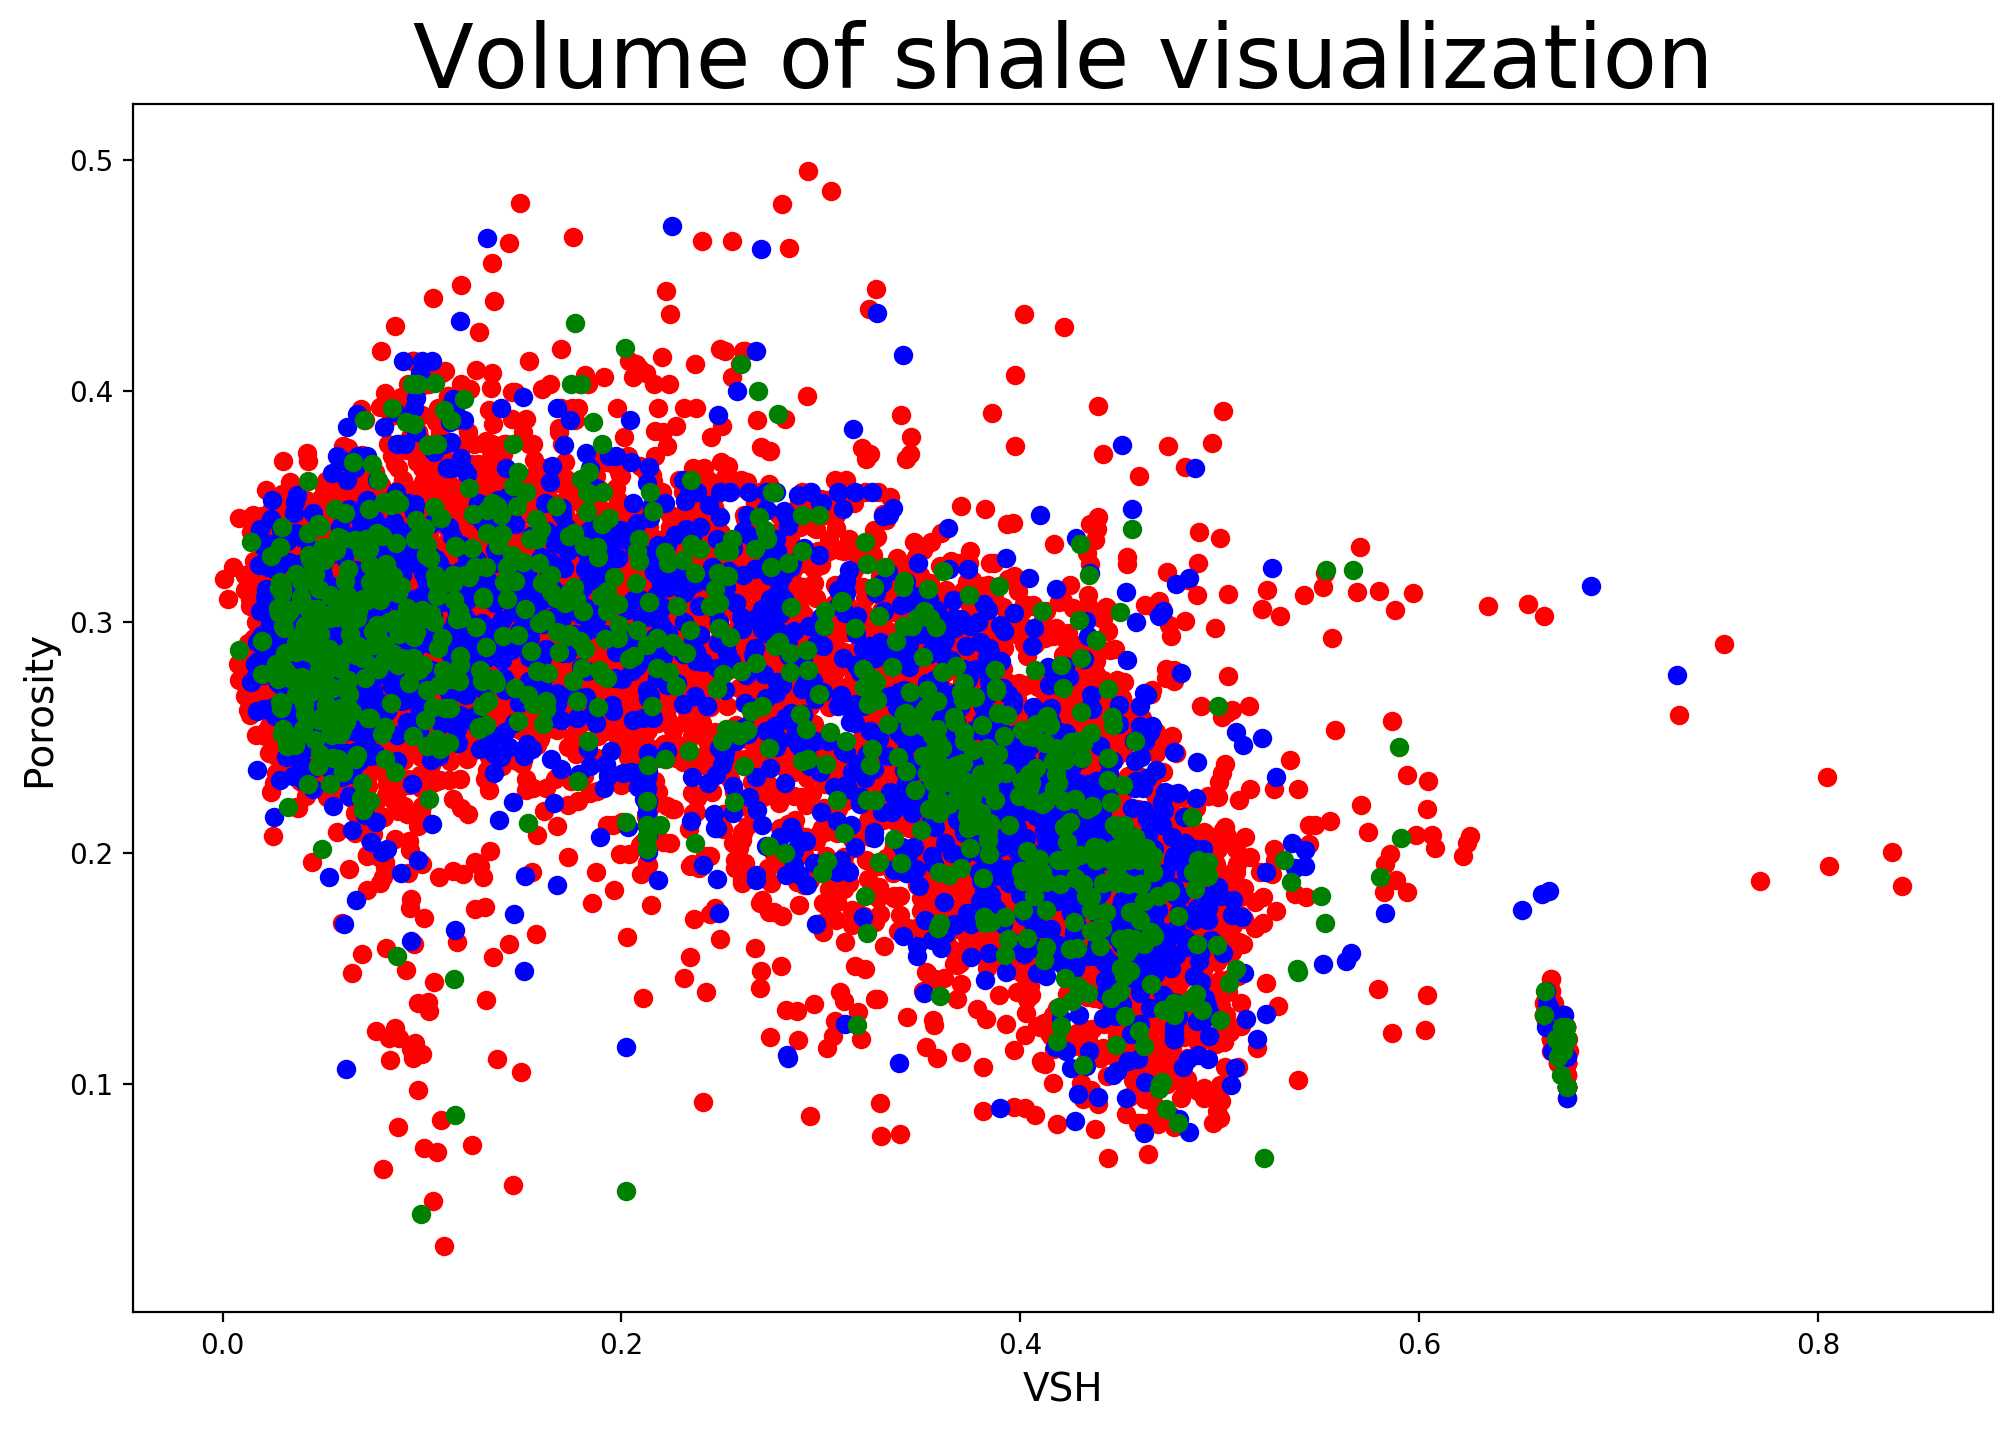

In [22]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.title("Volume of shale visualization", fontsize = 32)
plt.xlabel("VSH", fontsize = 14)
plt.ylabel("Porosity", fontsize = 14)
plt.scatter(X_train[:,3],y_train, c='r')
plt.scatter(X_test[:,3],y_test, c='b')
plt.scatter(X_val[:,3],y_val, c='g')
#plt.savefig('/content/gdrive/My Drive/Colab Notebooks/Log_data/VSH visualization model1.jpg', dpi=300)

In [0]:
import torch
import torchvision
from torch import optim, nn
import torch.nn.functional as F

In [24]:
traindata = torch.tensor(X_train, requires_grad= True)
traintargets = torch.tensor(y_train, requires_grad= True)
testdata = torch.tensor(X_test, requires_grad= True)
testtargets = torch.tensor(y_test, requires_grad= True)
valdata = torch.tensor(X_val, requires_grad= True)
valtargets = torch.tensor(y_val, requires_grad= True)
print(traindata.shape)
print(traintargets.shape)
print(testdata.shape)
print(testtargets.shape)
print(valdata.shape)
print(valtargets.shape)

torch.Size([7471, 4])
torch.Size([7471, 1])
torch.Size([2076, 4])
torch.Size([2076, 1])
torch.Size([831, 4])
torch.Size([831, 1])


In [0]:
class poroNet (nn.Module):
  def __init__(self):
    super().__init__()
    
    self.fc1 = nn.Linear(4,100)
    self.fc2 = nn.Linear(100,50)
    self.fc3 = nn.Linear(50,25)
    self.fc4 = nn.Linear(25,1)
    
    self.dropout = nn.Dropout(p=0.2)
    self.hiddendropout = nn.Dropout(p=0.5)
  def forward(self,x):
    
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.hiddendropout(F.relu(self.fc2(x)))
    x = self.hiddendropout(F.relu(self.fc3(x)))
    x = F.sigmoid(self.fc4(x))
    
    return x


In [0]:
class simplenet (nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(4,20)
    self.fc2 = nn.Linear(20,10)
    self.fc3 = nn.Linear(10,5)
    self.fc4 = nn.Linear(5,1)
    
  def forward(self,x):
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    
    return x

In [27]:
model = simplenet()
model

simplenet(
  (fc1): Linear(in_features=4, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=5, bias=True)
  (fc4): Linear(in_features=5, out_features=1, bias=True)
)

In [0]:
opt = optim.Adam(model.parameters(), lr = 0.001, weight_decay = 1e-5 )
criterion = nn.MSELoss()

In [29]:
traindata

tensor([[2.3736e+00, 1.0530e+02, 9.8554e+01, 4.0734e-01],
        [2.2098e+00, 1.0195e+02, 3.8716e+01, 1.0675e-01],
        [2.3736e+00, 9.5100e+01, 1.1072e+02, 4.6848e-01],
        ...,
        [2.3537e+00, 8.5800e+01, 9.1792e+01, 3.7338e-01],
        [2.3912e+00, 8.7400e+01, 1.1009e+02, 4.6528e-01],
        [2.4793e+00, 8.6659e+01, 1.1238e+02, 4.7678e-01]], requires_grad=True)

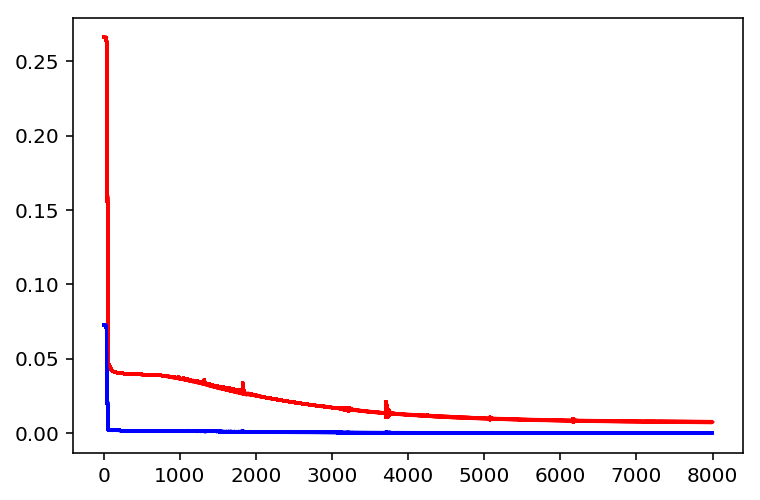

In [30]:
iterations = 8000
steps = 0
training_loss= []
val_loss = []

for iter in range(1,iterations+1):
  opt.zero_grad()
  pred = model(traindata)
  loss = torch.sqrt(criterion(pred, traintargets))
  loss.backward()
  opt.step()
        
  #model validation
  model.eval()
  output = model(valdata)
  valloss = criterion(output, valtargets)
  
  training_loss.append(loss)
  val_loss.append(valloss)
  
  plt.plot(training_loss, c = 'r')
  plt.plot(val_loss, c ='b')

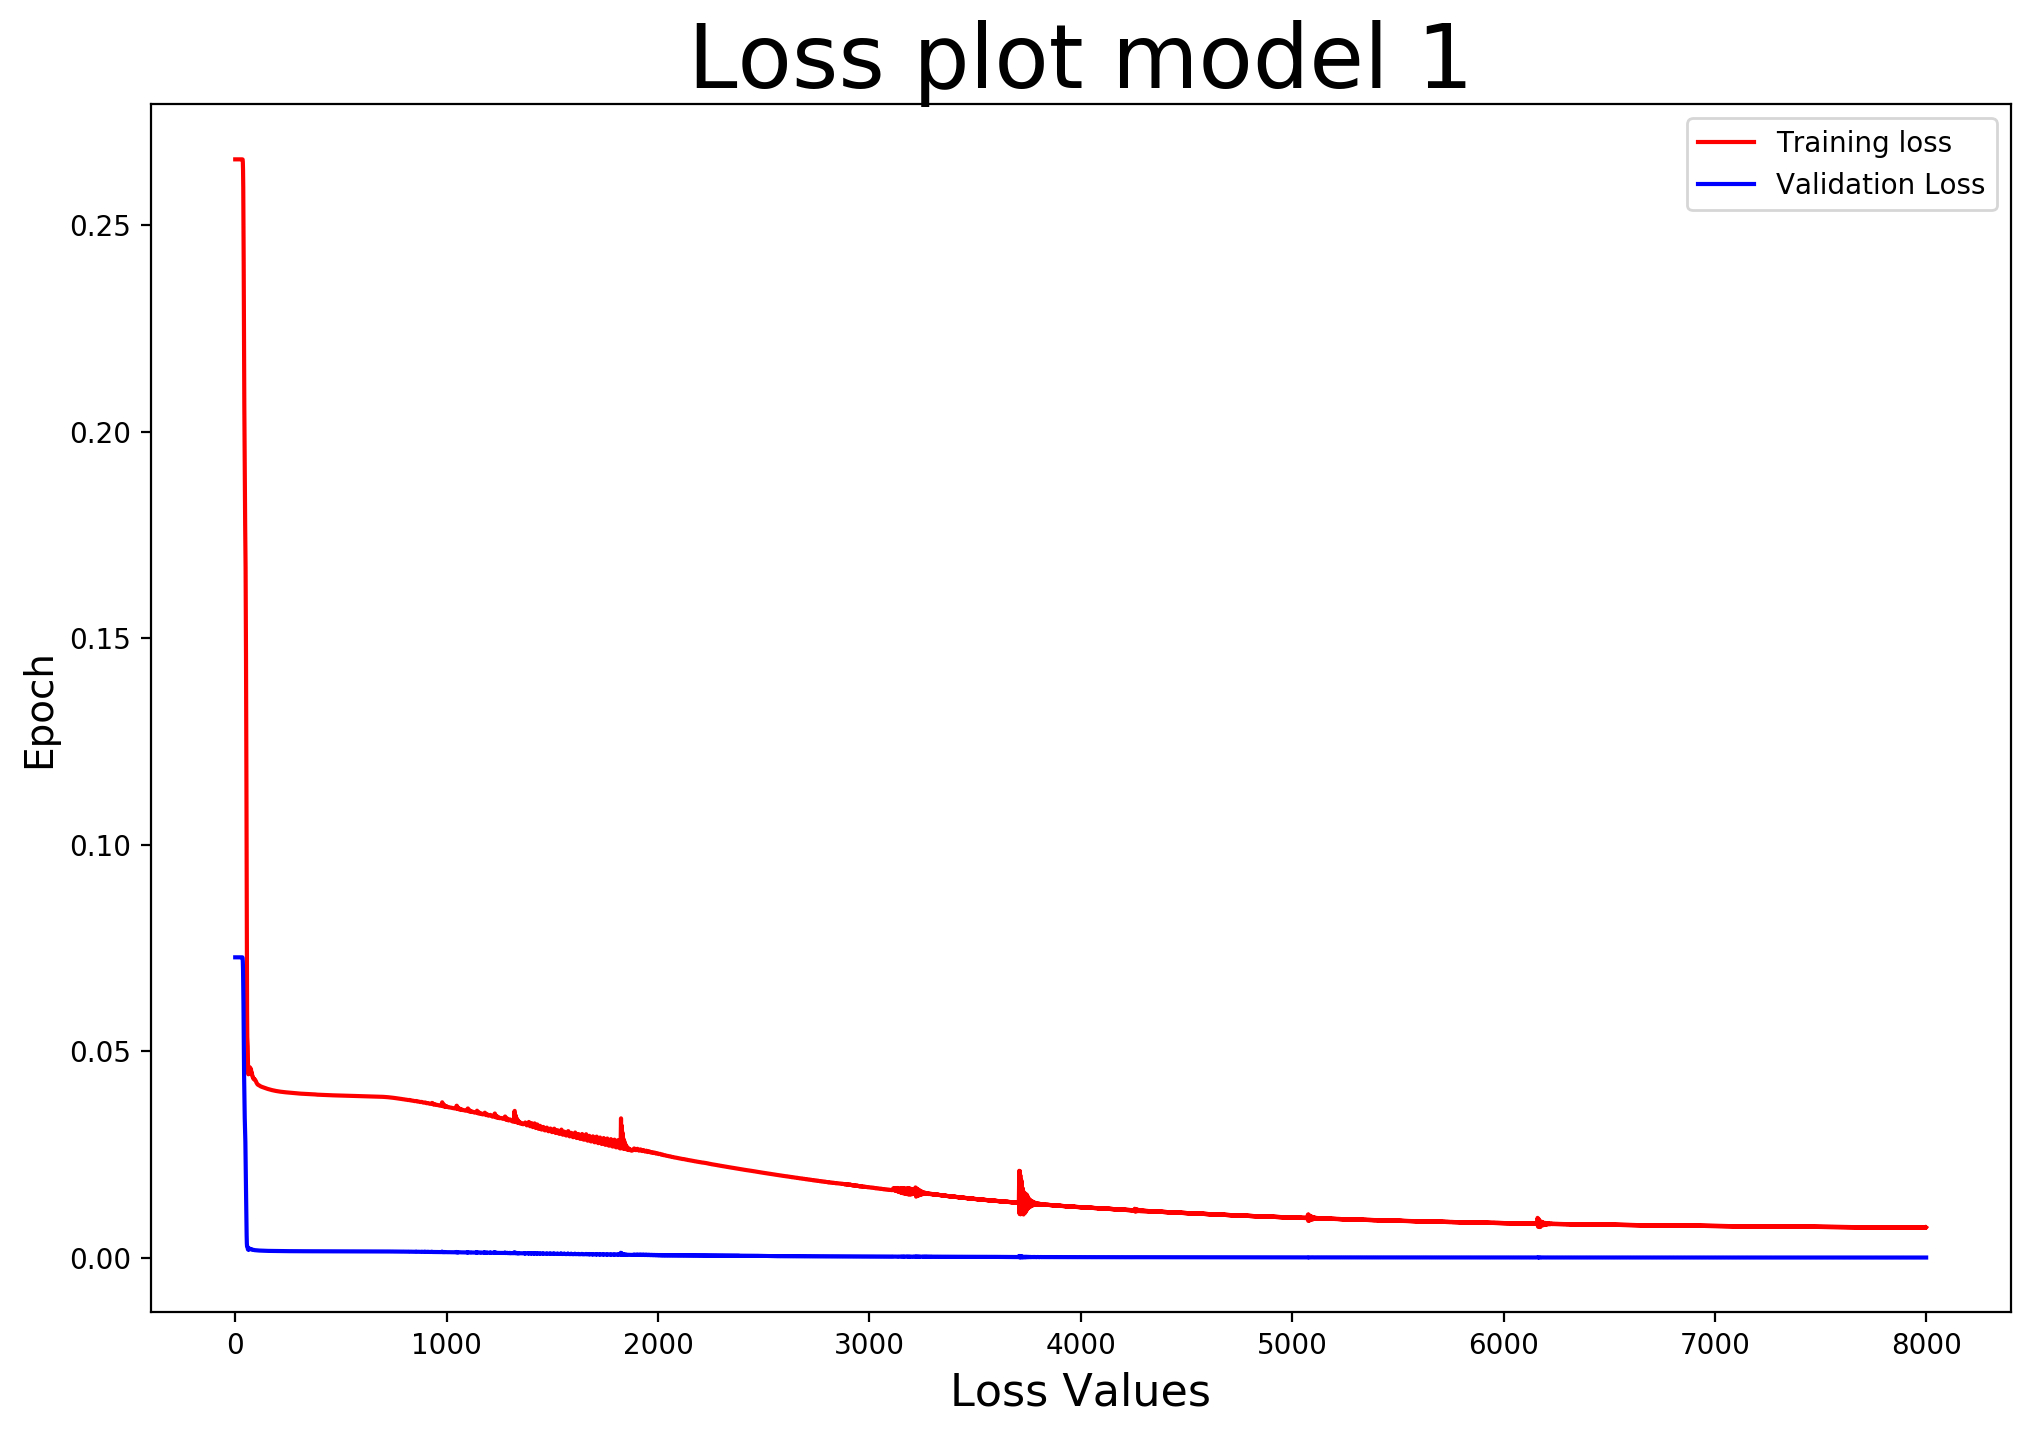

In [31]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.title("Loss plot model 1", fontsize = 32)
plt.xlabel("Loss Values", fontsize = 16)
plt.ylabel("Epoch", fontsize = 14)
plt.plot(training_loss, label = "Training loss", c = 'r')
plt.plot(val_loss, label ="Validation Loss" , c ='b')
plt.legend(frameon=True)
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/Log_data/Loss model final95.jpg', dpi=300)

In [32]:
from sklearn.metrics import r2_score
test_loss=[]
with torch.no_grad():
  model.eval()
  output1 = model(testdata)
  testloss = criterion(output1, testtargets)
  
  preds_result = output1.detach().numpy()
  accuracy = np.sum(testtargets.detach().numpy()>=preds_result)/len(testtargets)
  test_loss.append(testloss)
  print ("Test Accuracy {:.2f}".format(accuracy))
  print(output1.size())
  print(testtargets.size())

Test Accuracy 1.00
torch.Size([2076, 1])
torch.Size([2076, 1])


In [33]:
y1 = testtargets.detach().numpy()
y_pred1 = output1.detach().numpy()
y_pred1.shape

results = r2_score(y1,y_pred1)
print (results)

0.9864562053596357


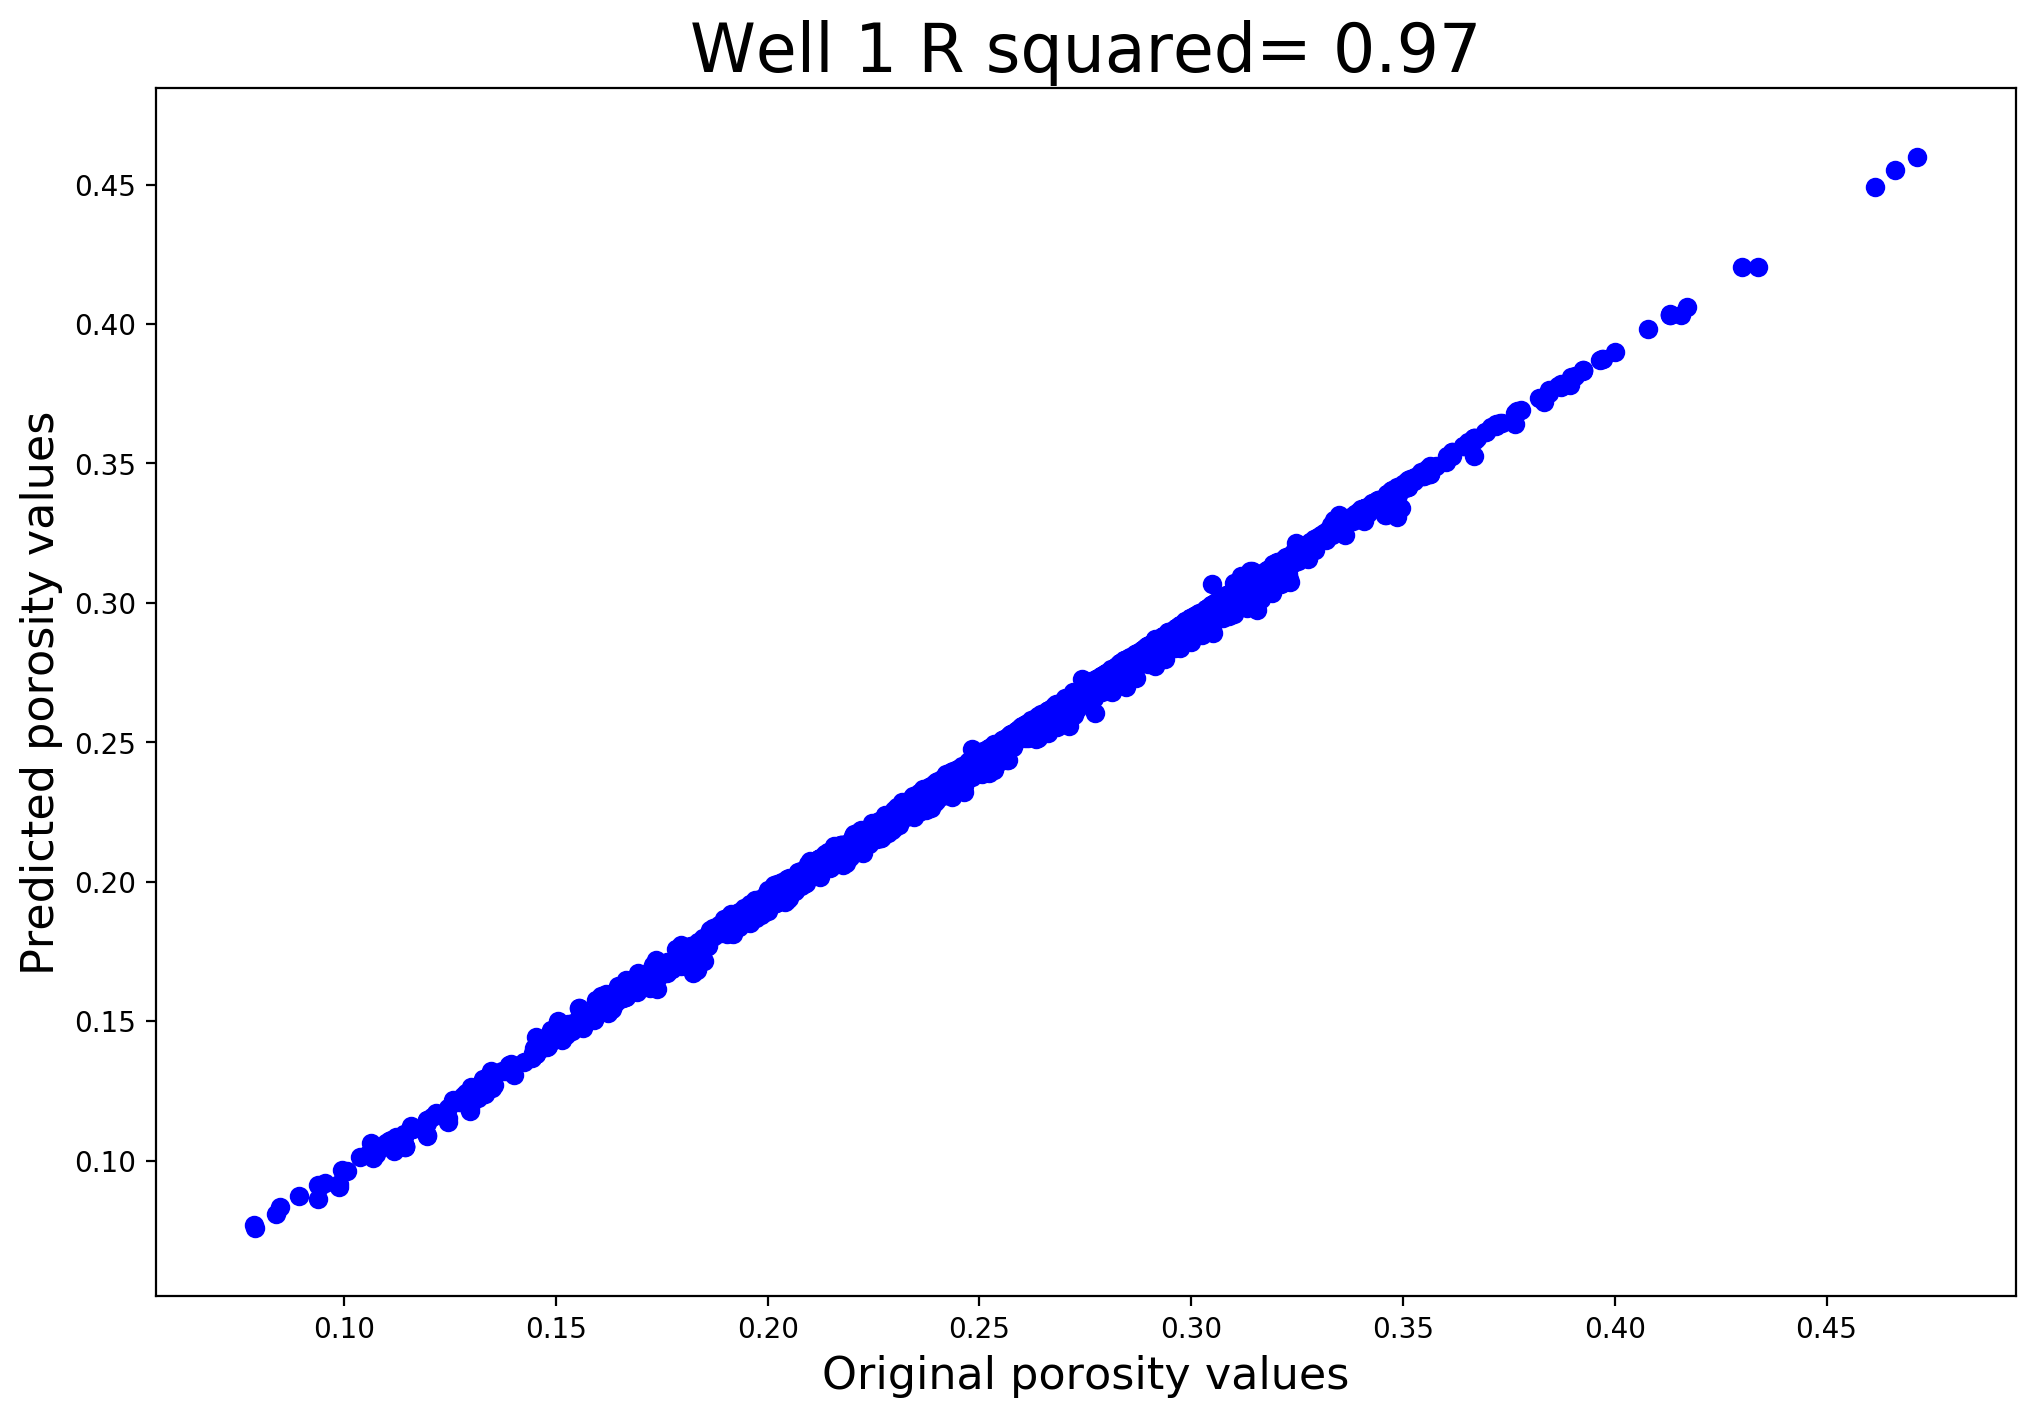

In [34]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.title("Well 1 R squared= 0.97", fontsize = 24)
plt.xlabel("Original porosity values", fontsize = 16)
plt.ylabel("Predicted porosity values", fontsize = 16)
plt.scatter(y1,y_pred1, c= 'b')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/Log_data/Well 1 R0.97.jpg', dpi=300)


In [35]:
newtestdata = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Log_data/test data.csv', encoding = 'utf-8')
newtestdata

,Den Norm,AC Norm,GR Norm,IGR,poro
0,2.287800,101.480406,90.616354,0.428084,0.246901
1,2.264591,101.262700,77.767912,0.339651,0.260473
2,2.252976,99.738752,65.053686,0.252142,0.267266
3,2.229732,101.698113,55.921949,0.189290,0.280859
4,2.218042,98.940493,49.882304,0.147720,0.287695
5,2.206312,100.827286,46.836671,0.126758,0.294554
6,2.182966,102.496372,45.107371,0.114856,0.308207
7,2.136410,102.641509,44.730539,0.112262,0.335433
8,2.147914,103.512337,47.445798,0.130950,0.328705
9,2.159479,104.746009,46.444353,0.124058,0.321942


In [0]:
newtarget = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Log_data/test data.csv', encoding = 'utf-8')[['poro']]

In [0]:
new_copy = newtestdata.copy()
inputdata = new_copy.drop(['poro'],axis=1)

In [38]:
newTarget = torch.Tensor(newtarget.values)
testinput = torch.Tensor(inputdata.values)
ftestinput = torch.tensor(testinput.numpy(), requires_grad =True)
fTarget = torch.tensor(newTarget.numpy(), requires_grad = True)
print(newTarget.size())
print(testinput.size())

torch.Size([498, 1])
torch.Size([498, 4])


In [39]:
from sklearn.metrics import r2_score
test_loss1=[]
with torch.no_grad():
  model.eval()
  output1 = model(ftestinput)
  testloss1 = criterion(output1, fTarget)
  
  preds_result = output1.detach().numpy()
  accuracy = np.sum(fTarget.detach().numpy()>=preds_result)/len(testtargets)
  test_loss.append(testloss1)
  print ("Test Accuracy {:.2f}".format(accuracy))
  print(output1.size())
  print(fTarget.size())

Test Accuracy 0.24
torch.Size([498, 1])
torch.Size([498, 1])


In [40]:
y = fTarget.detach().numpy()
y_pred = output1.detach().numpy()
y_pred.shape

results = r2_score(y,y_pred)
print (results)

0.9839748766888475


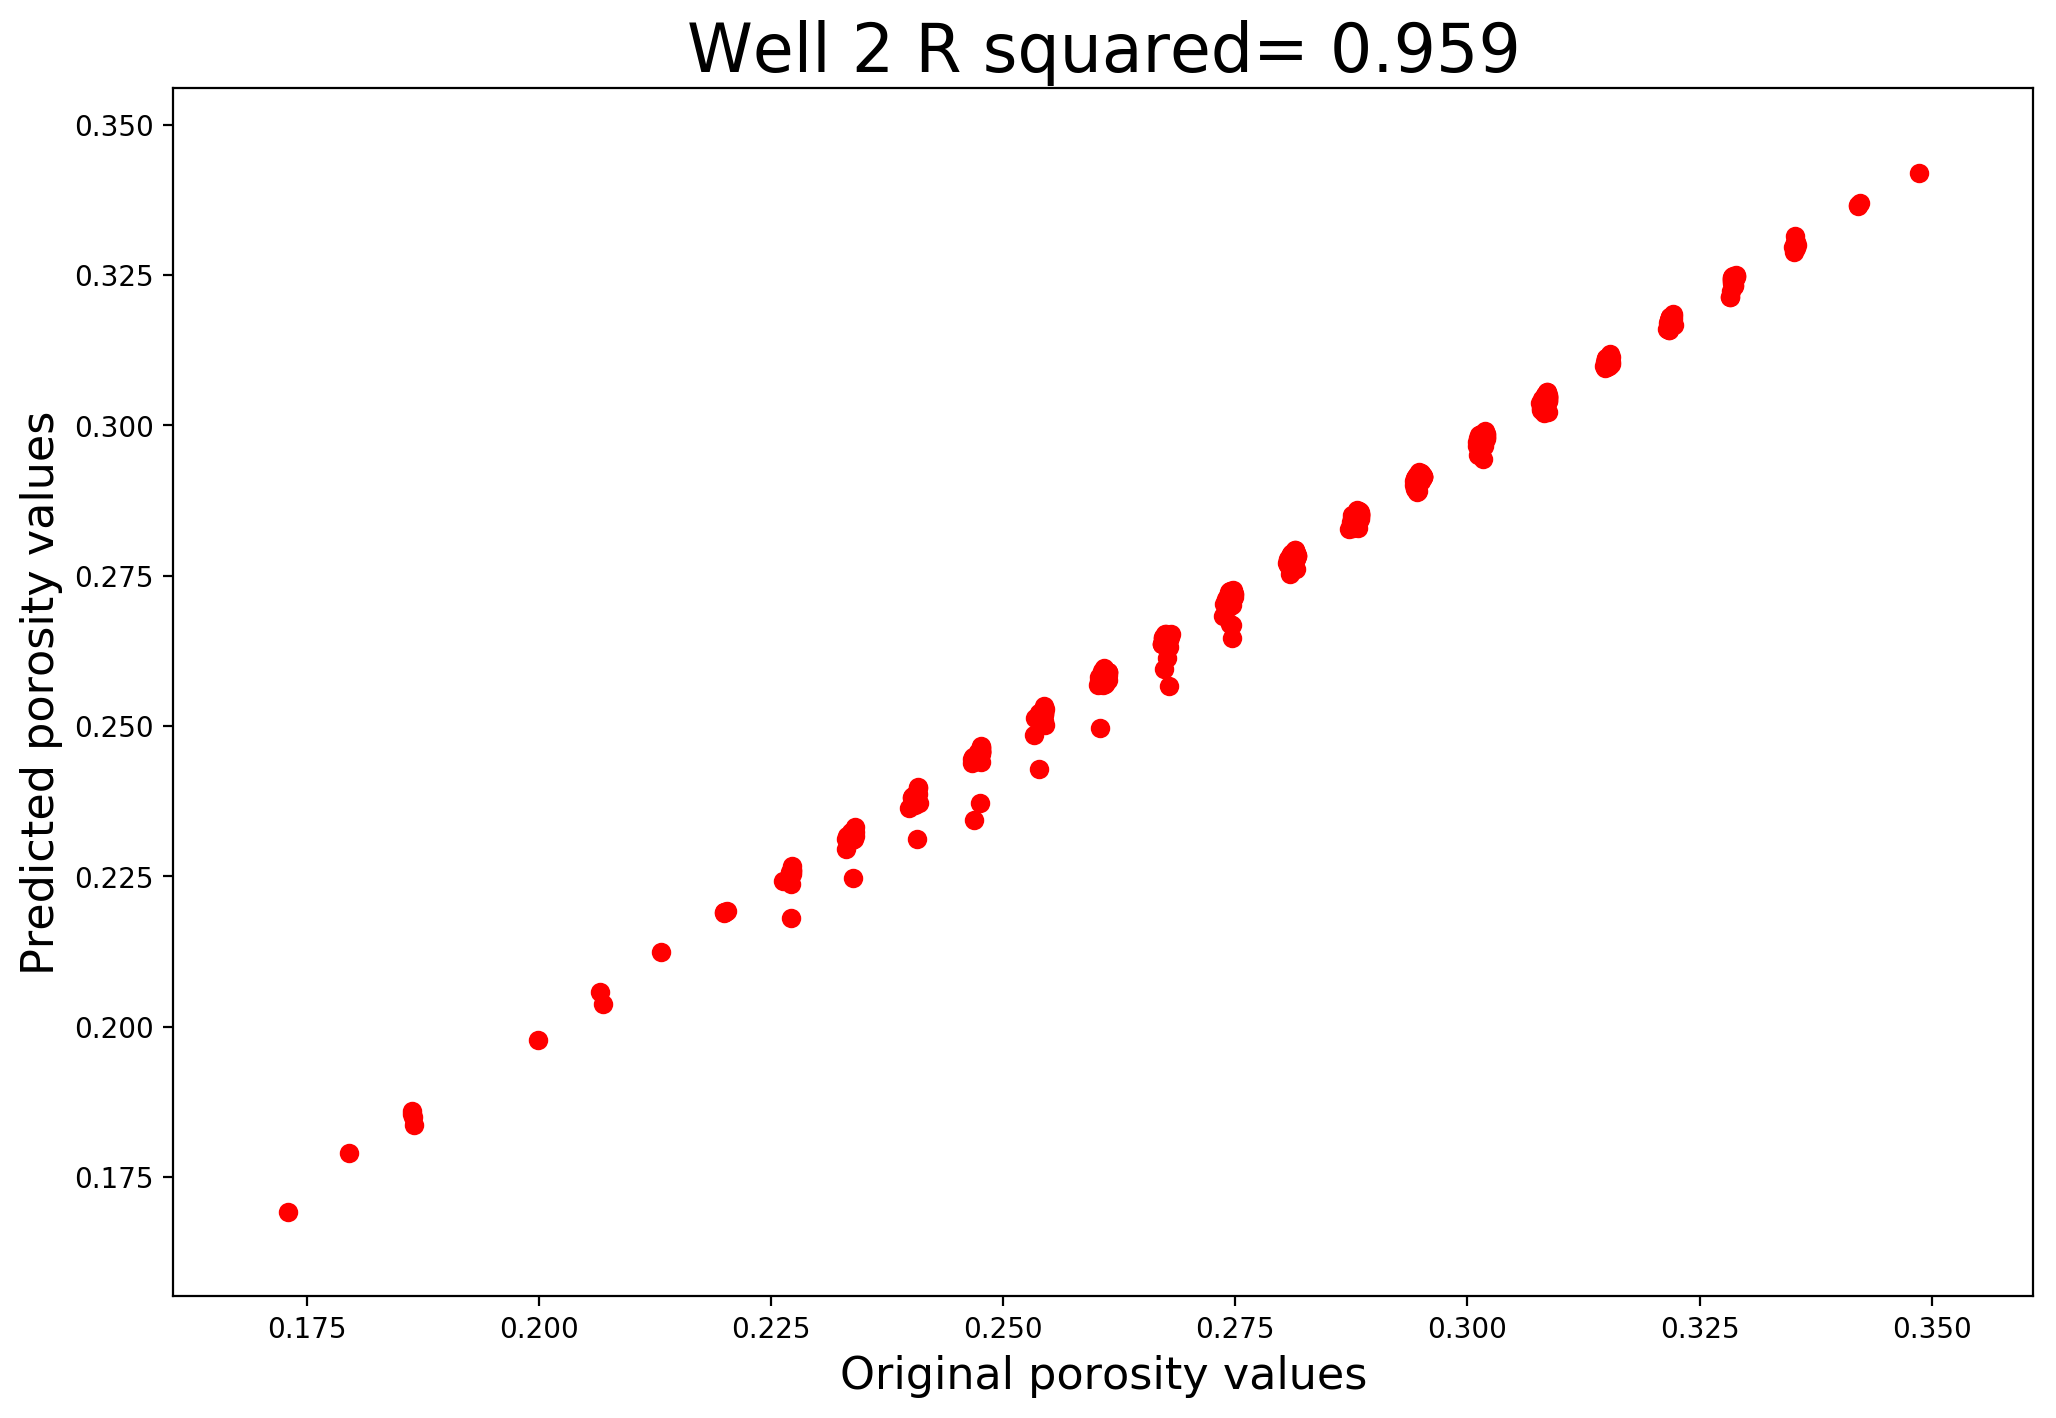

In [41]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.title("Well 2 R squared= 0.959", fontsize = 24)
plt.xlabel("Original porosity values", fontsize = 16)
plt.ylabel("Predicted porosity values", fontsize = 16)
plt.scatter(y,y_pred, c= 'r')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/Log_data/Well 2 R0.959.jpg', dpi=300)

In [0]:
#model_state_name = 'Model97.pth'
#path = F"/content/gdrive/My Drive/Colab Notebooks/Log_data/{model_state_name}"
#torch.save(model.state_dict(),path)

In [43]:
!pip install tf-encrypted

! URL="https://github.com/openmined/PySyft.git" && FOLDER="PySyft" && if [ ! -d $FOLDER ]; then git clone -b dev --single-branch $URL; else (cd $FOLDER && git pull $URL && cd ..); fi;

!cd PySyft; python setup.py install  > /dev/null

import os
import sys
module_path = os.path.abspath(os.path.join('./PySyft'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
!pip install --upgrade --force-reinstall lz4
!pip install --upgrade --force-reinstall websocket
!pip install --upgrade --force-reinstall websockets
!pip install --upgrade --force-reinstall zstd

From https://github.com/openmined/PySyft
 * branch              HEAD       -> FETCH_HEAD
Already up to date.
zip_safe flag not set; analyzing archive contents...
  Using cached https://files.pythonhosted.org/packages/0a/c6/96bbb3525a63ebc53ea700cc7d37ab9045542d33b4d262d0f0408ad9bbf2/lz4-2.1.10-cp36-cp36m-manylinux1_x86_64.whl
ERROR: syft 0.1.23a1 has requirement msgpack>=0.6.1, but you'll have msgpack 0.5.6 which is incompatible.
  Found existing installation: lz4 2.1.10
    Uninstalling lz4-2.1.10:
      Successfully uninstalled lz4-2.1.10


  Using cached https://files.pythonhosted.org/packages/bf/45/142141aa47e01a5779f0fa5a53b81f8379ce8f2b1cd13df7d2f1d751ae42/greenlet-0.4.15-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f2/ca/5b5962361ed832847b6b2f9a2d0452c8c2f29a93baef850bb8ad067c7bf9/gevent-1.4.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: greenlet 0.4.15
    Uninstalling greenlet-0.4.15:
      Successfully uninstalled greenlet-0.4.15
  Found existing installation: gevent 1.4.0
    Uninstalling gevent-1.4.0:
      Successfully uninstalled gevent-1.4.0
  Found existing installation: websocket 0.2.1
    Uninstalling websocket-0.2.1:
      Successfully uninstalled websocket-0.2.1
  Using cached https://files.pythonhosted.org/packages/f0/4b/ad228451b1c071c5c52616b7d4298ebcfcac5ae8515ede959db19e4cd56d/websockets-8.0.2-cp36-cp36m-manylinux1_x86_64.whl
ERROR: syft 0.1.23a1 has requirement msgpack>=0.6.1, but you'll have msgpack 0.5.6 which is incompatible.
  Found 

In [44]:
import syft as sy
hook = sy.TorchHook(torch)

# Create a couple of workers
bob = sy.VirtualWorker(hook, id="bob")  
alice = sy.VirtualWorker(hook, id="alice")
secureworker = sy.VirtualWorker(hook, id="secureworker")

W0820 22:26:40.904199 140319773034368 secure_random.py:26] Falling back to insecure randomness since the required custom op could not be found for the installed version of TensorFlow. Fix this by compiling custom ops. Missing file was '/usr/local/lib/python3.6/dist-packages/tf_encrypted/operations/secure_random/secure_random_module_tf_1.14.0.so'
W0820 22:26:40.921283 140319773034368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/tf_encrypted/session.py:26: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



In [0]:
Encryptmodel = model.fix_precision().share(alice,bob,crypto_provider = secureworker)

In [0]:
Encryptinput =  ftestinput.fix_precision().share(alice,bob,crypto_provider = secureworker)

In [0]:
Encrypttarget = fTarget.fix_precision().share(alice,bob,crypto_provider = secureworker)

In [0]:
model1 = Encryptmodel

In [49]:
from sklearn.metrics import r2_score
test_loss=[]
with torch.no_grad():
  model1.eval()
  
  output = model1(Encryptinput)
  #testloss = criterion(output, Encrypttarget)
  
  #preds_result = output.detach().numpy()
  #accuracy = np.sum(fTarget.detach().numpy()>=preds_result)/len(testtargets)
  #test_loss.append(testloss)
  #print ("Test Accuracy {:.2f}".format(accuracy))
  #print(output.size())
  #print(fTarget.size())
  
  print("completed")

completed


In [0]:
fTarget = Encrypttarget.get().float_precision()


In [51]:
fTarget.size()

torch.Size([498, 1])

In [0]:
output2 = output.get().float_precision()

In [53]:
y = fTarget.detach().numpy()
y_pred = output2.detach().numpy()
y_pred.shape

results = r2_score(y,y_pred)
print (results)

0.8134288006097444


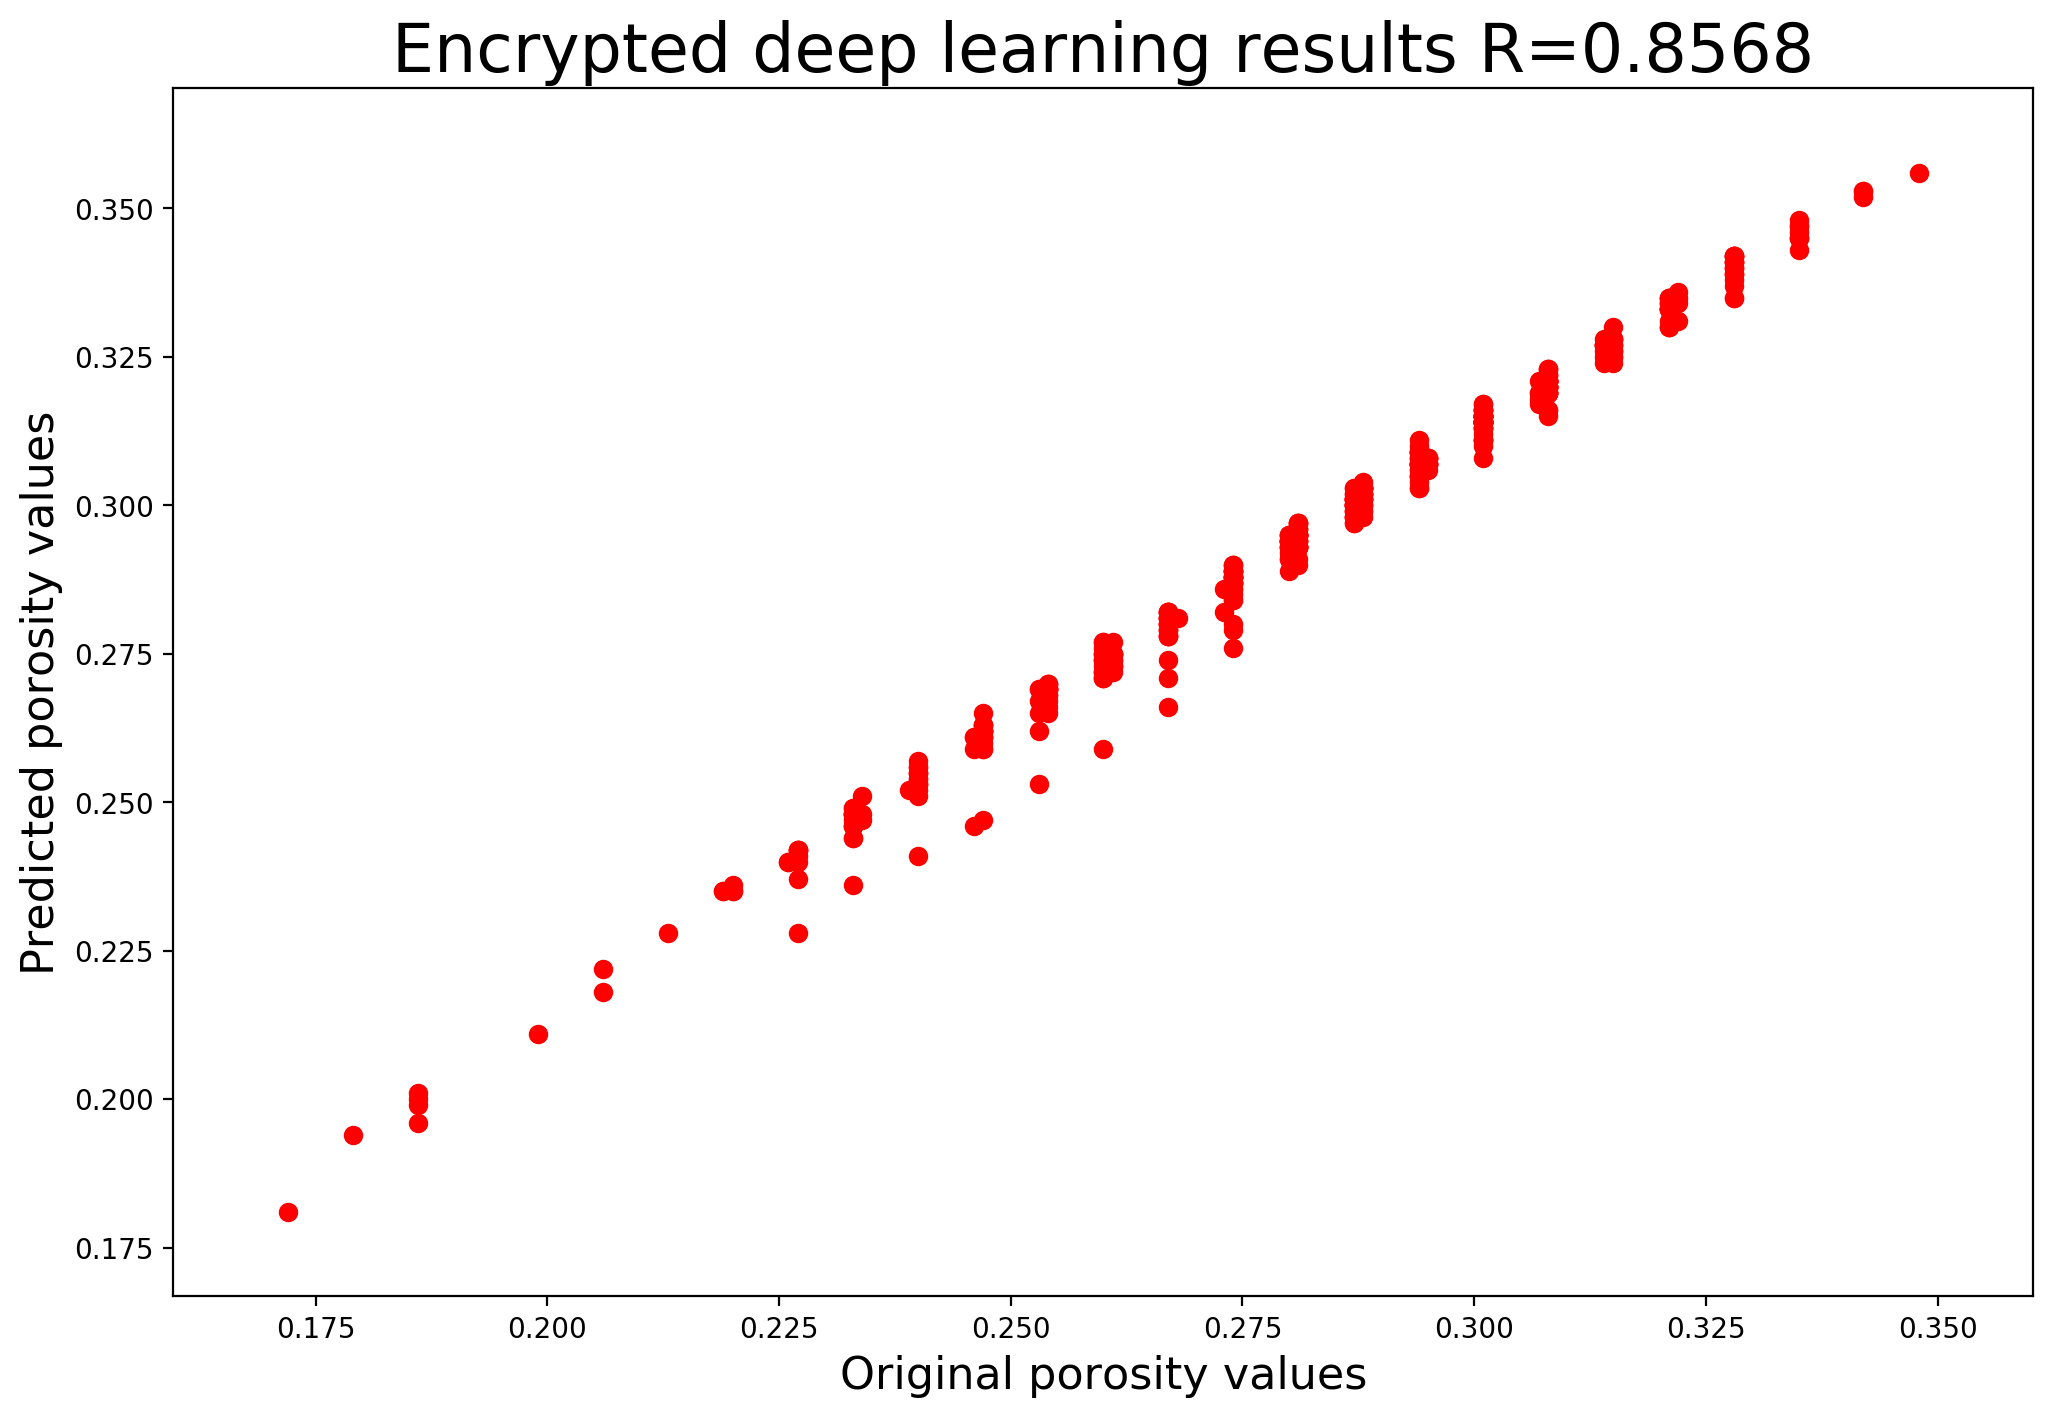

In [54]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.title("Encrypted deep learning results R=0.8568", fontsize = 24)
plt.xlabel("Original porosity values", fontsize = 16)
plt.ylabel("Predicted porosity values", fontsize = 16)
plt.scatter(y,y_pred, c= 'r')
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/Log_data/Encrypted deep learning R0.8568.jpg', dpi=300)